In [74]:
using Plots, LinearAlgebra, Statistics

## Exercise 1

Implement the steepest descent algorithm for a general differentiable function 

In [21]:
function steepest_descent(x0, f, gradf, alpha, kmax, tollgrad)
    xk = x0
    
    xseq = []
    push!(xseq, xk)
    
    lastk = -1
    
    for k in 1:kmax
        if norm(gradf(xk)) < tollgrad
            break
        end
        
        xk = xk - alpha * gradf(xk)
        push!(xseq, xk)
        lastk = k
    end
    
    fk = f(xk)
    gradfk_norm = norm(gradf(xk))
    
    return xk, fk, gradfk_norm, lastk, xseq
end

steepest_descent (generic function with 1 method)

Test the method on a simple parabula.

In [40]:
contourf(
    -5:1e-2:5,
    -5:1e-2:5,
    (x1,x2)->norm([x1;x2])^2,
    xlabel="x1", ylabel="x2",
    dpi=20,
)
scatter!([-3],[4], label="x0")

We can see how the method converges to the global minimu on this convex function. Let's plot the path taken.

In [25]:
xk, fk, gradfk_norm, lastk, xseq = steepest_descent([-3; 4], x -> norm(x)^2, x -> 2*x, 1e-2, 100, 1e-6)

([-0.39785866768425965, 0.5304782235790126], 0.43969866514303896, 1.3261955589475316, 100, Any[[-3, 4], [-2.94, 3.92], [-2.8811999999999998, 3.8416], [-2.8235759999999996, 3.764768], [-2.7671044799999995, 3.68947264], [-2.7117623903999997, 3.6156831872], [-2.6575271425919995, 3.543369523456], [-2.6043765997401596, 3.47250213298688], [-2.5522890677453565, 3.4030520903271424], [-2.5012432863904492, 3.3349910485205996]  …  [-0.4771930861532592, 0.6362574482043454], [-0.467649224430194, 0.6235322992402584], [-0.45829623994159013, 0.6110616532554533], [-0.4491303151427583, 0.5988404201903442], [-0.4401477088399031, 0.5868636117865373], [-0.43134475466310507, 0.5751263395508066], [-0.422717859569843, 0.5636238127597905], [-0.4142635023784461, 0.5523513365045947], [-0.4059782323308772, 0.5413043097745027], [-0.39785866768425965, 0.5304782235790126]])

In [39]:
scatter!([xk[1] for xk in xseq], [xk[2] for xk in xseq], legend=false)

# Exercise 2

Use steepest descent to estimate the coefficients of the a Lotka-Volterra model

First of all let's translate the MATLAB definition of the model.

In [45]:
# % function [xn,yn,x_eq,y_eq,tn] = Lotka_Volterra_E_Espl(a,b,c,d,...
# %    x0,y0,t0,T,N)
# %
# % Function that return the time serieses of the Prey-Predator model of 
# % Lotka-Volterra through the explicit Euler Method.
# %
# %   INPUTS:
# %   a = preys' reproduction coefficient;
# %   b = preys' death coefficient due to predators' hunting;
# %   c = predators' death coefficient;
# %   d = predators' survival % reproduction coefficient hunting preys;
# %   x0 = starting number of prey population;
# %   y0 = starting number of prey population;
# %   t0 = starting time of integration;
# %   T = final time of integration;
# %   N = number of intervals for splitting [t0,T]
# %
# %   OUTPUTS:
# %   xn = time series of prey population;
# %   yn = time series of predator population;
# %   x_eq = x-axis of the stable equilibrium point (if a>0, otherwise 0);
# %   y_eq = y-axis of the stable equilibrium point (if a>0, otherwise 0);
# %   tn = total number of instants characterizing the time serieses.
# %
# %

function Lotka_Volterra_E_Espl(a,b,c,d,x0,y0,t0,T,N)

    if a>0
        x_eq=c/d; 
        y_eq=a/b;
    else
        x_eq=0;
        y_eq=0;
    end

    h=(T-t0)/N;
    tn=range(t0,stop=T,length=N+1);

    xn=zeros(1,N+1);
    yn=zeros(1,N+1);
    xn[(1)]=x0; yn[(1)]=y0;

    for i =1: N
        xn[(i+1)]= xn[(i)]+(a-b*yn[(i)])*xn[(i)]*h;
        yn[(i+1)]= yn[(i)]+(-c+d*xn[(i)])*yn[(i)]*h;
    end
    
    return xn,yn,x_eq,y_eq,tn
end

Lotka_Volterra_E_Espl (generic function with 1 method)

Then let's test use it to simulate the evolution of a prey-predator system.

In [231]:
xn,yn,x_eq,y_eq,tn = Lotka_Volterra_E_Espl(1,0.02,1,0.01,50,20,0,30,1500)

([50.0 50.6 … 177.55618273409686 180.26952852144893], [20.0 19.8 … 11.795954587857254 11.978924429765048], 100.0, 50.0, 0.0:0.02:30.0)

Let's plot the populations over time and the orbits.

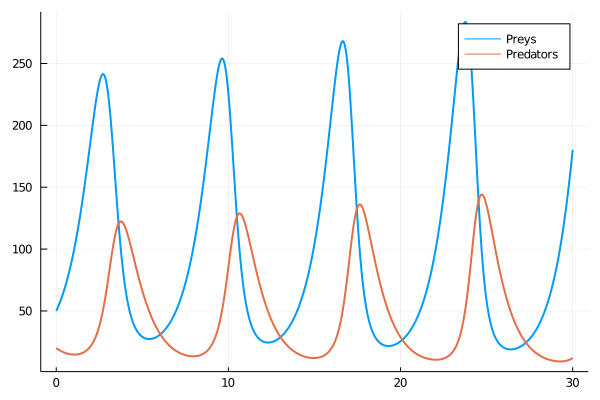

In [232]:
plot(tn, [reshape(xn, :) reshape(yn, :)], labels=["Preys" "Predators"], dpi=25, lw=2)

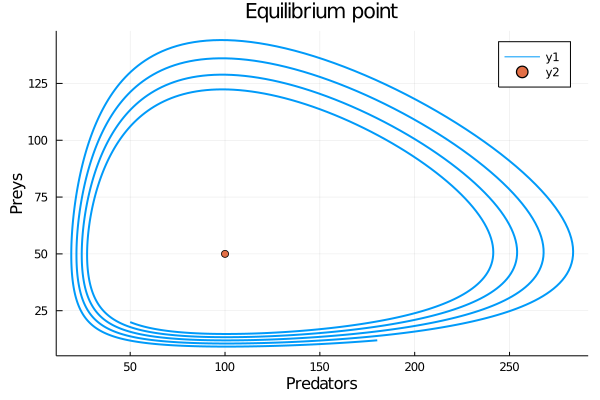

In [233]:
plot(reshape(xn, :), reshape(yn, :), dpi=25, xlabel="Predators", ylabel="Preys", lw=2)
scatter!([1/0.01], [1/0.02], title="Equilibrium point")

## Coefficient estimation

The orbit are the curve levels of this function $H$.

In [118]:
H(xt, yt, a, b, c, d) = c*log(xt) - d*xt - b*yt + a*log(yt)

H (generic function with 2 methods)

We can see how plotting $H$ with the same parameters $a, b, c, d$ results in a contour identical to the orbit.

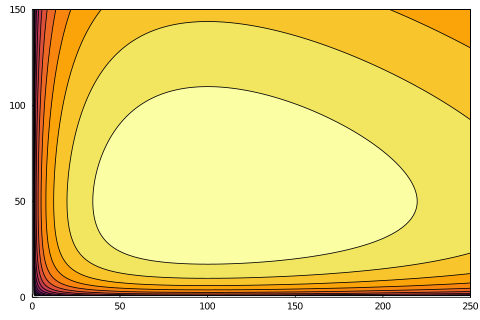

In [234]:
contourf(0:1:250, 0:1:150, (x,y)->H(x,y, 1,0.02,1,0.01), dpi=20, legend=false)

Now let's take the some observations from an unknown system which we want to model using Lotka-Volterra

In [183]:
prey_predator_samples = [
    48 22  
    95 14  
    179 28  
    224 73  
    64 113
]

5×2 Array{Int64,2}:
  48   22
  95   14
 179   28
 224   73
  64  113

And let's plot it over time

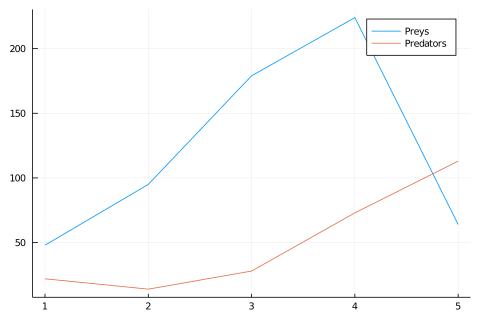

In [235]:
plot(prey_predator_samples, dpi=20, label=["Preys" "Predators"])

Let's define our loss function

In [152]:
Hbar(a,b,c,d) = mean(H(xi,yi,a,b,c,d) for (xi, yi) in eachrow(prey_predator_samples))

Hbar (generic function with 1 method)

In [120]:
Loss(a,b,c,d) = mean((H(xi, yi, a,b,c,d) - Hbar(a,b,c,d) for (xi, yi) in eachrow(prey_predator_samples)).^2)

Loss (generic function with 1 method)

And using the central differences method, define the gradient

In [173]:
Loss_grad(a,b,c,d) = [
    (Loss(a+1e-3,b,c,d)-Loss(a-1e-3,b,c,d))/2e-3,
    (Loss(a,b+1e-3,c,d)-Loss(a,b-1e-3,c,d))/2e-3,
    (Loss(a,b,c+1e-3,d)-Loss(a,b,c-1e-3,d))/2e-3,
    (Loss(a,b,c,d+1e-3)-Loss(a,b,c,d-1e-3))/2e-3,
]

Loss_grad (generic function with 1 method)

Optimize the loss using steepest descent

In [236]:
xk, fk, gradfk_norm, lastk, xseq = steepest_descent(
    [1,1,1,1],
    x -> Loss(x[1],x[2],x[3],x[4]),
    x -> Loss_grad(x[1],x[2],x[3],x[4]),
    1e-6, 20_000, 1e-8)
xk

4-element Array{Float64,1}:
 1.0212017527182538
 0.019769510784589456
 1.0078708546846158
 0.010488595382863035

And plot the contour using the estimated coefficients

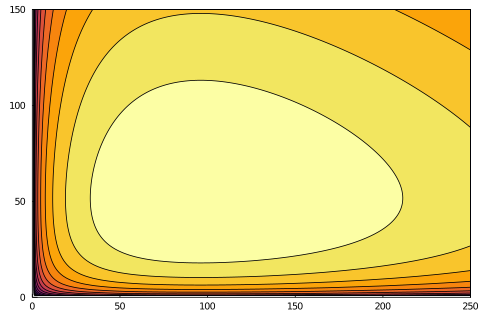

In [237]:
contourf(0:1:250, 0:1:150, (x,y)->H(x,y, xk...), dpi=20, legend=false)

Let's use it to find the initial populations

In [245]:
Hbar(xk...)

6.097704877408246

In [265]:
best = 1e9
bestpop = nothing
for x1 in 0:250, x2 in 0:150
    delta = abs(H(x1, x2, xk...)-Hbar(xk...))
    if delta < best
        best = delta
        bestpop = (x1, x2)
    end
end
bestpop

(159, 107)

We can see how our approximations fits well the sampled data

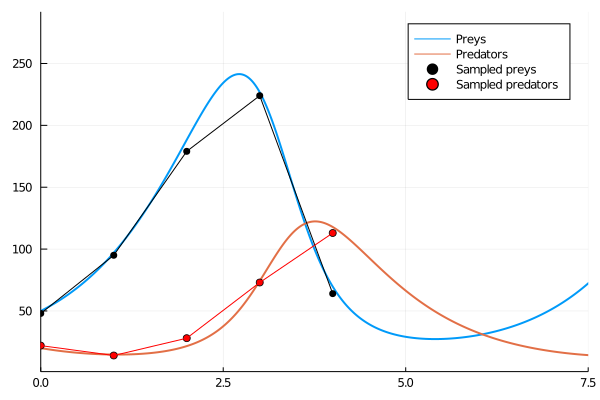

In [244]:
xn,yn,x_eq,y_eq,tn = Lotka_Volterra_E_Espl(1,0.02,1,0.01,50,20,0,30,1500)
plot(tn, [reshape(xn, :) reshape(yn, :)], labels=["Preys" "Predators"], dpi=25, lw=2, xlims=(0, 7.5))

scatter!(0:4, prey_predator_samples, color=[:black :red], labels=["Sampled preys" "Sampled predators"])
plot!(0:4, prey_predator_samples, lc=[:black :red], labels=nothing)